In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
# f1 = lambda x: 5.5*torch.sin(x*2*math.pi*5.1)
# f2 = lambda x: 5.0*torch.sin(x*2*math.pi*2.1)
# f3 = lambda x: 5.5*torch.sin(x*2*math.pi*4.1)

f1 = lambda x: 2.5*torch.sin(x*2*math.pi*5.1)
f2 = lambda x: 3.0*torch.sin(x*2*math.pi*2.1)
f3 = lambda x: 2.5*torch.sin(x*2*math.pi*4.1)

f= [f1,f2,f3]


nfull,nsub,nsub2=200,30,30
#nfull,nsub=100,50
nchannels = 3
x_lb,x_ub=0,4

idx=np.sort(np.random.randint(nfull, size=(nchannels, nsub)),axis=1)
idx2=np.sort(np.random.randint(nfull, size=(nchannels, nsub2)),axis=1)

x_c = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx[j]])[None,:] for j in range(nchannels)],dim=0)
x_t = torch.cat([(torch.linspace(x_lb,x_ub,nfull)[idx2[j]])[None,:] for j in range(nchannels)],dim=0)
y_c = torch.cat([f[j](x_c[j])[None,:] for j in range(nchannels)],dim=0)
y_t = torch.cat([f[j](x_t[j])[None,:] for j in range(nchannels)],dim=0)


x_c=x_c.T.unsqueeze(dim=0)
y_c=y_c.T.unsqueeze(dim=0)
x_t=x_t.T.unsqueeze(dim=0)
y_t=y_t.T.unsqueeze(dim=0)

nb=3
xc=x_c.repeat(nb,1,1).unsqueeze(dim=-2)
yc=y_c.repeat(nb,1,1)
xt=x_t.repeat(nb,1,1).unsqueeze(dim=-2)
yt=y_t.repeat(nb,1,1)

In [3]:
a = torch.randn(10,5,3,3)

In [4]:
a.diagonal(dim1=-2,dim2=-1)[0,1,...]

tensor([0.0420, 2.8106, 1.4502])

In [5]:
a[0,1,...]

tensor([[ 0.0420,  0.4237,  0.0256],
        [-0.0726,  2.8106,  0.7910],
        [-0.6239, -0.5578,  1.4502]])

## test kernels

In [6]:
# from torch.autograd import Variable
# from torch.distributions.normal import Normal
# from torch.distributions.uniform import Uniform

# import torch
# import numpy as np

# import torch.nn as nn
# import math
# import itertools as it


# class Multioutput_kernel(nn.Module):
#     def __init__(self,in_dims=1,num_channels=3):
#         super(Multioutput_kernel,self).__init__()
#         self.in_dims = in_dims
#         self.num_channels = num_channels        
#         return
                        
#     def eval_Kxz(x,z=None):
#         raise NotImplementedError
        

        
# class RBF_kernel(Multioutput_kernel):
#     def __init__(self,in_dims=1,num_channels=3, scales=0.1,loglik_err=0.1):
#         super(Rbf_kernel,self).__init__(in_dims,num_channels)                        
#         self.logsigma = nn.Parameter( torch.log(eps + torch.ones(num_channels)) ,requires_grad=False)   
#         self.logmu =    nn.Parameter( torch.log(eps + 0.01 + 0*torch.rand(in_dims,num_channels))  ,requires_grad=False)              #nparams                        
#         self.logstd =   nn.Parameter( torch.log(eps + scales*torch.ones(in_dims,num_channels)) )    #nparams                         
#         self.loglik =   nn.Parameter( torch.log(eps + loglik_err*torch.ones(num_channels)) )
    
#     def prepare_cross_params(self,eps=1e-6):
#         num_channels = self.num_channels
#         mu = self.logmu.exp()
#         std = self.logstd.exp()
#         ndim = self.in_dims

#         cross_mu,cross_std,cross_weight = [],[],[]
#         #product_list = list(it.product(list(np.arange(num_channels)),repeat = 2))

#         for (j,i) in self.product_list:
#             # std cross
#             std_j_inv = 1/(std[:,j]+eps)
#             std_i_inv = 1/(std[:,i]+eps)
#             std_ji_inv = std_j_inv+std_i_inv
#             std_ji = 1/(std_ji_inv+eps)

#             # mu cross            
#             mu_j = mu[:,j]
#             mu_i = mu[:,i]
#             mu_ji = std_ji*(std_j_inv*mu_j + std_i_inv*mu_i)

#             # normalizer cross                        
#             std_ji = std[:,j] + std[:,i] 
#             exp_in = ((mu_j-mu_i)/std_ji)**2            
#             determinant = (pi2**self.in_dims)*(std_ji**2).prod()
#             determinant = torch.sqrt(determinant)
#             weight = (1/determinant)*torch.exp(-0.5*exp_in.sum())
            
#             cross_mu.append(mu_ji)
#             cross_std.append(std_ji)
#             cross_weight.append(weight[None])

#         cross_mu = torch.cat(cross_mu).reshape(ndim,num_channels**2)
#         cross_std = torch.cat(cross_std).reshape(ndim,num_channels**2)
#         cross_weight = torch.cat(cross_weight).reshape(1,num_channels**2)
        
#         return cross_mu,1/(cross_std+eps),cross_weight

    
    
#     def eval_Kxz(xc,xt=None,zitter=1e-5,zitter_flag = False):
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#             xt : (nb,ntarget,ndim,nchannel)
#         outputs:
#             Kxz : (nb,ntarget,ncontext,nchannel)      # assume y-value is 1-d      
#         """
        
#         assert len(xc.size()) == 4         
#         if xt is None:
#             xt = xc
#             zitter_flag = True
                
#         #check size        
#         nb,ndata,ndim,nchannels = xc.size()                    
#         #compute RBF
#         sigma2 = (2*self.logsigma).exp()[None,None,None,...] + eps   
#         #length_scales = self.logstd.exp()[None,None,...] + eps              
        
#         mu_,inv_std_,weight_=self.prepare_cross_params()
        
        
        
#         xc_= xc/length_scales
#         xt_= xt/length_scales                
        
#         xc2 = (xc_**2).sum(dim=-2).unsqueeze(-2)
#         xt2 = (xt_**2).sum(dim=-2).unsqueeze(-2)        
#         xxT = xc2 + xt2.permute(0,2,1,3)  -2*torch.einsum('bnmc,bmkc->bnkc',xc_,xt_.permute(0,2,1,3))
#         Kxz = sigma2*torch.exp(-0.5*xxT) 
#         if zitter_flag :
#             likerr = (2*self.loglik).exp()
#             noise_scale= (zitter+likerr)[None,None,None,:] 
#             noise_eye = noise_scale*(torch.eye(ndata).to(xc.device)[None,:,:,None]).repeat(1,1,1,self.num_channels)
#             return Kxz + noise_eye
#         else:
#             return Kxz
        
        
        
        
        
        
# class SM_kernel(Multioutput_kernel):
#     def __init__(self,in_dims=1,num_channels=3, scales=0.1,loglik_err=0.1):
#         super(SM_kernel,self).__init__(in_dims,num_channels)
                        
#         self.logsigma = nn.Parameter( torch.log(eps + torch.ones(num_channels)) ,requires_grad=False)         
#         #self.logmu =    nn.Parameter( torch.log(eps + 0.05 + scales*torch.ones(in_dims,num_channels)) )              #nparams        
#         self.logmu =    nn.Parameter( torch.log(eps + 0.01 + 0.09*torch.rand(in_dims,num_channels)) )              #nparams                
#         #self.logstd =   nn.Parameter( torch.log(eps + scales*torch.ones(in_dims,num_channels)) )    #nparams       
#         self.logstd =   nn.Parameter( torch.log(eps + 0.05 + scales*torch.rand(in_dims,num_channels)) )    #nparams                                 
#         self.loglik =   nn.Parameter( torch.log(eps + loglik_err*torch.ones(num_channels)) )
        
#         self.product_list = list(it.product(list(np.arange(self.num_channels)),repeat = 2))
#         self.target_idx = [idx  for idx,(ii,jj) in enumerate(self.product_list) if ii==jj]
        
    
    
#     def prepare_cross_params(self,eps=1e-6):
#         num_channels = self.num_channels
#         mu = self.logmu.exp()
#         std = self.logstd.exp()
#         ndim = self.in_dims

#         cross_mu,cross_std,cross_weight = [],[],[]
#         #product_list = list(it.product(list(np.arange(num_channels)),repeat = 2))

#         for (j,i) in self.product_list:
#             # std cross
#             std_j_inv = 1/(std[:,j]+eps)
#             std_i_inv = 1/(std[:,i]+eps)
#             std_ji_inv = std_j_inv+std_i_inv
#             std_ji = 1/(std_ji_inv+eps)

#             # mu cross            
#             mu_j = mu[:,j]
#             mu_i = mu[:,i]
#             mu_ji = std_ji*(std_j_inv*mu_j + std_i_inv*mu_i)

#             # normalizer cross                        
#             std_ji = std[:,j] + std[:,i] 
#             exp_in = ((mu_j-mu_i)/std_ji)**2            
#             determinant = (pi2**self.in_dims)*(std_ji**2).prod()
#             determinant = torch.sqrt(determinant)
#             weight = (1/determinant)*torch.exp(-0.5*exp_in.sum())
            
#             cross_mu.append(mu_ji)
#             cross_std.append(std_ji)
#             cross_weight.append(weight[None])

#         cross_mu = torch.cat(cross_mu).reshape(ndim,num_channels**2)
#         cross_std = torch.cat(cross_std).reshape(ndim,num_channels**2)
#         cross_weight = torch.cat(cross_weight).reshape(1,num_channels**2)
        
#         return cross_mu,1/(cross_std+eps),cross_weight
#         #return cross_mu,cross_std,cross_weight


            

#     def eval_Kxx(self,xc,zitter=1e-6,zitter_flag = True):
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#         outputs:
#             Kxz : (nb,ncontext,ncontext,nchannel)      # assume y-value is 1-d      
#         """
#         #print(len(xc.shape))
#         assert len(xc.shape) == 4 and xc.size(-1) == self.num_channels                        
        
#         #check dataset        
#         nb,ndata,ndim,nchannels = xc.size()                            
#         xt = xc
        
#         #get model parameters
#         mu,inv_std,weight=self.prepare_cross_params()
#         mu = mu[...,self.target_idx]
#         inv_std = inv_std[...,self.target_idx]
#         weight = weight[...,self.target_idx] 

                
#         #compute exact kernel        
#         exp_xc_ = xc*inv_std
#         exp_xt_ = xt*inv_std
#         cos_xc_ = xc*mu
#         cos_xt_ = xt*mu

#         exp_xc2_ = torch.pow(exp_xc_[:,:,None,:],2).sum(dim=-2) 
#         exp_xt2_ = torch.pow(exp_xt_[:,None,:,:],2).sum(dim=-2) 
#         exp_term = exp_xc2_ + exp_xt2_  -2*torch.einsum('bijc,bjkc->bikc',exp_xc_,exp_xt_.permute(0,2,1,3))        
#         cos_term = cos_xc_.sum(dim=-2)[:,:,None,:] - cos_xt_.sum(dim=-2)[:,None,:,:] 
#         Kxz = weight[None,None,:,:]*torch.exp(-0.5*(pi2**2)*exp_term )*torch.cos(pi2*cos_term)
#         #Kxz = torch.exp(-0.5*(pi2**2)*exp_term )*torch.cos(pi2*cos_term)

        
#         #if zitter_flag :
#         likerr = (2*self.loglik).exp()
#         noise_scale= (zitter+likerr)[None,None,None,:] 
#         noise_eye = noise_scale*(torch.eye(ndata).to(xc.device)[None,:,:,None]).repeat(1,1,1,self.num_channels)
#         return Kxz + noise_eye

    
        
#     def eval_Kxz(self,xc,xt=None,zitter=1e-6,zitter_flag = False):
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel**2)
#             xt : (nb,ntarget,ndim,nchannel**2)
#         outputs:
#             Kxz : (nb,ntarget,ncontext,nchannel**2)      # assume y-value is 1-d      
#         """
#         #print(len(xc.shape))
#         assert len(xc.shape) == 4         
#         if xt is None:
#             xt = xc
#             zitter_flag = True
                
#         #check size        
#         nb,ndata,ndim,nchannels2 = xc.size()                            
#         #xc_ = xc.repeat(1,1,1,self.num_channels)  #(nb,ndata1,ndim,nchannels**2)
#         #xt_ = xt.repeat(1,1,1,self.num_channels)  #(nb,ndata2,ndim,nchannels**2)

#         mu,inv_std,weight = self.prepare_cross_params()        
#         exp_xc_ = xc*inv_std
#         exp_xt_ = xt*inv_std
#         cos_xc_ = xc*mu
#         cos_xt_ = xt*mu

#         #exp_term = torch.pow(exp_xc_[:,:,None,:]-exp_xt_[:,None,:,:],2).sum(dim=-2)
#         exp_xc2_ = torch.pow(exp_xc_[:,:,None,:],2).sum(dim=-2) 
#         exp_xt2_ = torch.pow(exp_xt_[:,None,:,:],2).sum(dim=-2) 
#         exp_term = exp_xc2_ + exp_xt2_  -2*torch.einsum('bijc,bjkc->bikc',exp_xc_,exp_xt_.permute(0,2,1,3))        
#         cos_term = cos_xc_.sum(dim=-2)[:,:,None,:] - cos_xt_.sum(dim=-2)[:,None,:,:] 
#         Kxz = weight[None,None,:,:]*torch.exp(-0.5*(pi2**2)*exp_term )*torch.cos(pi2*cos_term)

#         return Kxz
#         #if zitter_flag :
#         #    likerr = (2*self.loglik).exp()
#         #    noise_scale= (zitter+likerr)[None,None,None,:] 
#         #    noise_eye = noise_scale*(torch.eye(ndata).to(xc.device)[None,:,:,None]).repeat(1,1,1,nchannels2)
#         #    return Kxz + noise_eye
#         #else:
#         #    return Kxz
        
        
        

## param l

In [7]:

# # -----------------------------
# # conv random fourier 
# # -----------------------------    
# from torch.autograd import Variable
# from torch.distributions.normal import Normal
# from torch.distributions.uniform import Uniform

# import torch
# import numpy as np

# import torch.nn as nn
# import math
# import itertools as it

# pi2 = 2*math.pi
# eps=1e-6

# #class Multioutput_GPsampler(nn.Module):    
# class Independent_GPsampler(nn.Module):        
#     #def __init__(self,nbasis=10,in_channels=3, nparams = 3, w_mu = None,w_std= None):
#     def __init__(self,kernel=None,in_dims=1,out_dims=1,num_channels=3, num_fourierbasis = 20,num_sampleposterior=10 , scales=.1, loglik_err=1e-2, eps=1e-6):
#         super(Independent_GPsampler, self).__init__()
#         #super(Multioutput_GPsampler, self).__init__()
        
#         self.in_dims = in_dims
#         self.out_dims = out_dims
#         self.num_channels = num_channels
#         self.num_fourierbasis = num_fourierbasis
#         self.kernel = kernel
#         self.target_idx = self.kernel.target_idx                
#         self.normal0 = Normal(loc=0.0,scale=1.0)
#         self.uniform0 = Uniform(0,1)
            
#         self.w=None
#         self.b=None        
#         self.normalizer=None
#         self.random_w=None
#         return 

    
    
#     def sample_w_b(self,nb,eps=1e-6):    
#         """
#         self.w_mu : nparams
#         sample_w  : (nb,nfourifbasis,indim,nchannels)
#         sample_b  : (nb,nfouribasis,indim,nchannels)        
#         """        
#         mu,inv_std,weight = self.kernel.prepare_cross_params() #(indims,nchannels,nchannels),(indims,nchannels,nchannels)
#         mu = mu[...,self.target_idx]
#         inv_std = inv_std[...,self.target_idx]
#         weight = weight[...,self.target_idx]
        
#         eps1 = self.normal0.sample((nb,self.num_fourierbasis,self.in_dims,self.num_channels)).to(mu.device)
#         eps2 = self.uniform0.sample((nb,self.num_fourierbasis,self.in_dims,self.num_channels)).to(mu.device)    
        
#         #sample_w = mu_[None,None,:,:] + std_[None,None,:,:]*eps1    #(nb,nfouierbasis,indims,nchannels,nchannels)         
#         sample_w = mu[None,None,:,:] + inv_std[None,None,:,:]*eps1    #(nb,nfouierbasis,indims,nchannels,nchannels)                 
#         sample_b = eps2                                                #(nb,nfouierbasis,indims,nchannels,nchannels)
#         return sample_w,sample_b,weight

    
#     def sample_prior_shared(self,xc,xt,numsamples=10,reorder=False):        
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#             xt : (nb,ntarget,ndim,nchannel)        
#         outputs:
#             xa_samples : (nb,nchannel*(ncontext+ntarget),ndim)
#             Psi_pred    : (nb,nchannel*(ncontext+ntarget),nchannel)      # assume y-value is 1-d      
#         """
#         nb = xc.size(0)
#         #if xt in None:
#         #xa_samples = self.samples_xa(xc,xt)                                                 #(nb,nchannel*(ncontext+ntarget),ndim)  
#         xa_samples =self.build_xgrid(xc,xt)
#         w,b,normalizer = self.sample_w_b(nb)                                                           #(nb,nbasis,indim,numchannels)    
#         self.w = w
#         self.b = b
#         self.normalizer =normalizer
        
#         # inner product : cos in terms
#         xa_samples_ = xa_samples[:,None,:,:,None].repeat(1,1,1,1,self.num_channels)
#         w = w[:,:,None,:,:]                        
#         cos_interms = (xa_samples_*w).sum(dim=-2) + pi2*b          #(nb,1,nchannel*(ncontext+ntarget),ndim,1)*(nb,nfourierbasis,1,ndim,numchannels)          
#         Psi = torch.cos(cos_interms).unsqueeze(dim=1)                                        #(nb,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)
#         Psi = Psi.repeat(1,numsamples,1,1,1)                                                 #(nb,numsamples,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)
#         Psi = Psi.permute(0,1,3,2,4) 
#         nb,_,ndata,_,_ =Psi.size()        
        
#         random_w = self.normal0.sample((nb,numsamples,self.num_fourierbasis,self.num_channels)).to(xc.device)
#         self.random_w = random_w        
        
#         #scale_sigma = self.logsigma.exp().reshape(1,1,1,-1)                
#         #prior_samples = scale_sigma*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w)        
#         normalizer = normalizer[None,None,:,:].sqrt()
#         prior_samples = normalizer*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w)        
                    
#         if reorder:
#             xa_samples,idx_reorder = xa_samples.sort(dim=1)
#             idx_reorder = idx_reorder[:,None,:,:] 
#             prior_samples= torch.gather(prior_samples,2,idx_reorder.repeat(1,numsamples,1,nchannel))        
#         return xa_samples,prior_samples     

    
    
#     def sample_prior_independent(self,xc,numsamples=10):    
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#         outputs:
#             Psi_pred : (nb,ncontext,nchannel)      # assume y-value is 1-d      
#         """        
#         nb = xc.size(0)
#         #w,b = self.sample_w_b(nb)                                                           #(nb,nbasis,indim,numchannels)     
#         #w,b = self.w[...,self.target_idx],self.b[...,self.target_idx]      
#         w,b,normalizer = self.w, self.b, self.normalizer
        
#         xc_ = xc[:,None,:,:,:] #(nb,1,ndata,ndim,nchannels)
#         w_ =   w[:,:,None,:,:]                
#         cos_interms = (xc_*w_).sum(dim=-2) +pi2*b         
#         Psi = torch.cos(cos_interms) 
#         Psi = Psi.unsqueeze(dim=1)
#         Psi = Psi.repeat(1,numsamples,1,1,1)                                                 #(nb,numsamples,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)                
#         Psi = Psi.permute(0,1,3,2,4)
#         _,numsample,ndata,nfbasis,nchannels = Psi.size()
        
#         random_w = self.random_w
#         #scale_sigma = self.logsigma.exp().reshape(1,1,1,-1)        
#         #prior_samples = scale_sigma*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w) 
        
#         normalizer = normalizer[None,None,:,:].sqrt()
#         prior_samples = normalizer*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w)        
        
#         #Psi_pred = np.sqrt(2/self.num_fourierbasis)*(Psi*random_w).sum(dim=2)      #(nb,numsamples,ngrid,numchannels)               
#         return xc,prior_samples    

    
    
#     def prepare_updateterms(self,xc,yc,numsamples=1):
#         """
#         inputs
#             xc: #(nb,ndata,ndim,nchannels)
#             yc: #(nb,ndata,nchannels)
#         outputs
#             L: #(nb,nchannels,ndata,ndata)
#             delta_yc: #(nb,,nchannels,ndata,nsamples)            
#         """
#         nb,ndata,ndim,nchannel=xc.size()
#         nb,ndata,nchannel=yc.size()
#         xc,prior_samples = self.sample_prior_independent(xc,numsamples=numsamples)
#         #Kxx = self.evaluate_Kxz_indepedent(xc)  #(nb,ndata,data,nchannels)        
#         Kxx = self.kernel.eval_Kxx(xc)
#         Kxx = Kxx.permute(0,3,1,2)              #(nb,,nchannels,ndata,data)  
#         L = torch.linalg.cholesky(Kxx)                                                                             #(nb,nchannels,ndata,ndata) 
        
#         likerr = (2*self.kernel.loglik).exp()[None,None,None,:] 
#         delta_yc = yc[:,None,:,:] - (prior_samples  + likerr*torch.randn(nb,numsamples,1,nchannels).to(xc.device))         #(nb,numsample,ndata,nchannels)        
#         delta_yc= delta_yc.permute(0,3,2,1)                           #(nb,nchannels,ndata,numsamples)  
#         Kinv_yc = torch.cholesky_solve(delta_yc,L,upper=False)       #(nb,nchannels,ndata,ndata)^{-1}(nb,nchannels,ndata,numsamples)  
#         Kinv_yc = Kinv_yc.permute(0,3,2,1)                           #(nb,numsamples,ndata,nchannels)                  
#         return Kinv_yc 


    
#     def compute_updateterms(self,xc,yc,xt,numsamples=1,reorder=False):
#         """
#         inputs
#             xc: #(nb,ndata,ndim,nchannels)
#             yc: #(nb,ndata,nchannels)
#             xt: #(nb,ndata,ndim,nchannels)            
#         outputs
#         """        
#         nb,ndata,ndim,nchannel=xc.size()
#         xa_samples,prior_samples = self.sample_prior_shared(xc,xt,numsamples=numsamples)
#         Kinv_yc = self.prepare_updateterms(xc,yc,numsamples=numsamples)       
#         Kinv_yc = Kinv_yc.permute(0,2,1,3)        
        
#         # xa_ : (nb,ndata2,ndim,nchannel),  xc_ : (nb,ndata,ndim,nchannel)        
#         xa_ = xa_samples.unsqueeze(-1).repeat(1,1,1,nchannel)
#         xc_ = xc
#         #Kzx = self.kernel.eval_Kxz(xa_,xc_)     #(nb,data2,ndata,nchannels)       
#         Kzx = self.kernel.eval_Kxz_ind(xa_,xc_)     #(nb,data2,ndata,nchannels)       
        
#         update_term = torch.einsum('bnml,bmkl->bnkl',Kzx,Kinv_yc)             #(nb,data2,ndata,nchannels)#(nb,data,numsamples,nchannels)=(nb,data2,numsamples,nchannels)  
#         update_term = update_term.permute(0,2,1,3)                            #(nb,numsamples,data2,nchannels)          
#         density = Kzx.sum(dim=2)
#         return  update_term,density,xa_samples,prior_samples
    
    
#     def sample_posterior(self,xc,yc,xt,numsamples=1,reorder=False):
#         #xa_samples,prior_samples = self.sample_prior_shared(xc,xt,numsamples=numsamples,reorder=False)  #(nb,numsamples,nchannel*(ncontext+ntarget),numchannels) 
#         update_term,density,xa_samples,prior_samples = self.compute_updateterms(xc,yc,xt,numsamples=numsamples,reorder=False)    
#         posterior_samples = prior_samples + update_term

#         if reorder:            
#             nchannel=posterior_samples.size(-1)    
#             xa_samples,idx_reorder = xa_samples.sort(dim=1) #(nb,nchannel*(ncontext+ntarget),nchanels)            
#             idx_reorder = idx_reorder[:,None,:,:].repeat(1,numsamples,1,nchannel)             
#             prior_samples= torch.gather(prior_samples,2,idx_reorder)        
#             posterior_samples= torch.gather(posterior_samples,2,idx_reorder)

#         return xa_samples,posterior_samples,density

    
    
#     def samples_xa(self,xc,xt,radius=.1):
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#             xt : (nb,ntarget,ndim,nchannel)        
        
#         out
#             xa_samples : (nb,nchannels*(ndata+ndata2),ndim)
#         """
#         assert len(xc.size()) == 4 and len(xt.size()) == 4
#         nb,ndata,ndim,nchannel = xc.size()
#         xa = torch.cat([xc,xt],dim=1).reshape(nb,-1,ndim)   #(nb,ndata+ndata2,ndim)
#         std = xa.std(dim=1,keepdim=True)                  #(nb,1,ndim)
#         xa_samples = xa + radius*std*torch.randn_like(xa).to(xa.device)
#         return xa_samples 
    
    
#     def build_xgrid(self,xc,xt,ngrid=128):
#         nb,_,ndim,nchannel=xc.size()
#         xct = torch.cat([xc,xt],dim=1)
#         xgrid = torch.linspace(int(xct.min())-1,int(xct.max())+1,ngrid)
#         xgrid = xgrid.reshape(1,ngrid,1).repeat(nb,1,ndim).to(xc.device)
#         return xgrid
    


    
    
    
    
# class Multioutput_GPsampler(Independent_GPsampler):        
#     def __init__(self,kernel, in_dims=1,out_dims=1,num_channels=3, num_fourierbasis = 20,num_sampleposterior=10, eps=1e-6 ):
#         super(Multioutput_GPsampler, self).__init__(kernel,in_dims,out_dims,num_channels,num_fourierbasis,num_sampleposterior)        
#         self.kernel = kernel
#         self.target_idx = self.kernel.target_idx
#         self.w = None
#         self.b = None
#         self.normalizer = None
      
    
# #     def __init__(self,kernel=None,in_dims=1,out_dims=1,num_channels=3, num_fourierbasis = 20,num_sampleposterior=10 , scales=.1, loglik_err=1e-2, eps=1e-6):
# #         super(Efficient_GPsampler, self).__init__()
    
        
#     def sample_w_b(self,nb,eps=1e-6):    
#         """
#         self.w_mu : nparams
#         sample_w  : (nb,nfourifbasis,indim,nchannels)
#         sample_b  : (nb,nfouribasis,indim,nchannels)        
#         """        
#         mu,inv_std,weight = self.kernel.prepare_cross_params() #(indims,nchannels,nchannels),(indims,nchannels,nchannels)
#         eps1 = self.normal0.sample((nb,self.num_fourierbasis,self.in_dims,self.num_channels**2)).to(mu.device)
#         eps2 = self.uniform0.sample((nb,self.num_fourierbasis,self.in_dims,self.num_channels**2)).to(mu.device)    
        
#         #sample_w = mu_[None,None,:,:] + std_[None,None,:,:]*eps1    #(nb,nfouierbasis,indims,nchannels,nchannels)         
#         sample_w = mu[None,None,:,:] + inv_std[None,None,:,:]*eps1    #(nb,nfouierbasis,indims,nchannels,nchannels)                 
#         sample_b = eps2                                                #(nb,nfouierbasis,indims,nchannels,nchannels)
#         return sample_w,sample_b,weight
    
        
        
#     def sample_prior_shared(self,xc,xt,numsamples=10,reorder=False):        
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#             xt : (nb,ntarget,ndim,nchannel)        
#         outputs:
#             xa_samples : (nb,nchannel*(ncontext+ntarget),ndim)
#             Psi_pred    : (nb,nchannel*(ncontext+ntarget),nchannel)      # assume y-value is 1-d      
#         """
#         nb = xc.size(0)
#         #if xt in None:
#         #xa_samples = self.samples_xa(xc,xt)                                                 #(nb,nchannel*(ncontext+ntarget),ndim)  
#         xa_samples =self.build_xgrid(xc,xt)
#         w,b,normalizer = self.sample_w_b(nb)                                                           #(nb,nbasis,indim,numchannels**2)    
#         self.w = w
#         self.b = b
#         self.normalizer = normalizer

#         # inner product : cos in terms
#         #xa_samples_ = xa_samples[:,None,:,:,None].repeat(1,1,1,1,self.num_channels)        
#         xa_samples_ = xa_samples[:,None,:,:,None].repeat(1,1,1,1,self.num_channels**2)
#         w = w[:,:,None,:,:]         
        
        
#         cos_interms = (xa_samples_*w).sum(dim=-2) + pi2*b          #(nb,1,nchannel*(ncontext+ntarget),ndim,1)*(nb,nfourierbasis,1,ndim,numchannels)          
#         #cos_interms = pi2*(xa_samples_*w).sum(dim=-2) + pi2*b          #(nb,1,nchannel*(ncontext+ntarget),ndim,1)*(nb,nfourierbasis,1,ndim,numchannels)                  
         
            
#         Psi = torch.cos(cos_interms).unsqueeze(dim=1)                                        #(nb,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)
#         Psi = Psi.repeat(1,numsamples,1,1,1)                                                 #(nb,numsamples,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)
#         Psi = Psi.permute(0,1,3,2,4) 
#         nb,_,ndata,_,_ =Psi.size()        

#         random_w = self.normal0.sample((nb,numsamples,self.num_fourierbasis,self.num_channels**2)).to(xc.device)        
#         self.random_w = random_w        
        
#         #scale_sigma = self.logsigma.exp().reshape(1,1,1,-1)        
#         normalizer = normalizer[None,None,:,:].sqrt()                    #(1,1,1,nchannel**2)
#         prior_samples = normalizer*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w)        
        
#         if reorder:
#             xa_samples,idx_reorder = xa_samples.sort(dim=1)
#             idx_reorder = idx_reorder[:,None,:,:] 
#             prior_samples= torch.gather(prior_samples,2,idx_reorder.repeat(1,numsamples,1,nchannel))        
#         return xa_samples,prior_samples     
     
        
        
        
#     def sample_prior_independent(self,xc,numsamples=10):    
#         """
#         inputs:
#             xc : (nb,ncontext,ndim,nchannel)
#         outputs:
#             Psi_pred : (nb,ncontext,nchannel)      # assume y-value is 1-d      
#         """        
#         nb = xc.size(0)        
#         w = self.w[...,self.target_idx ]               #(nb,nbasis,indim,numchannels) 
#         b = self.b[...,self.target_idx ]       
#         normalizer = self.normalizer[...,self.target_idx ]
#         random_w = self.random_w[...,self.target_idx ]
              
#         xc_ = xc[:,None,:,:,:] #(nb,1,ndata,ndim,nchannels)
#         w_ =   w[:,:,None,:,:]                
#         cos_interms = (xc_*w_).sum(dim=-2) +pi2*b         
#         #cos_interms = pi2*(xc_*w_).sum(dim=-2) +pi2*b         
        
#         Psi = torch.cos(cos_interms) 
#         Psi = Psi.unsqueeze(dim=1)
#         Psi = Psi.repeat(1,numsamples,1,1,1)                                                 #(nb,numsamples,nfourierbasis,nchannel*(ncontext+ntarget),nunchannels)                
#         Psi = Psi.permute(0,1,3,2,4)
#         _,numsample,ndata,nfbasis,nchannels = Psi.size()
        
#         normalizer = normalizer[None,None,:,:].sqrt()
#         prior_samples = normalizer*np.sqrt(2/self.num_fourierbasis)*torch.einsum('bsnmc,bsmc->bsnc',Psi,random_w)     #(nb,nsample,ndata,nchannel)           
#         return xc,prior_samples    
        
    
    
    
#     def prepare_updateterms(self,xc,yc,numsamples=1):
#         """
#         inputs
#             xc: #(nb,ndata,ndim,nchannels)
#             yc: #(nb,ndata,nchannels)
#         outputs
#             L: #(nb,nchannels,ndata,ndata)
#             delta_yc: #(nb,,nchannels,ndata,nsamples)            
#         """
#         nb,ndata,ndim,nchannel=xc.size()
#         #nb,ndata,nchannel=yc.size()
        
#         xc,prior_samples = self.sample_prior_independent(xc,numsamples=numsamples)
#         Kxx = self.kernel.eval_Kxx(xc,zitter_flag=True)  #(nb,ndata,data,nchannels)              
#         Kxx = Kxx.permute(0,3,1,2)              #(nb,,nchannels,ndata,data)  
#         L = torch.linalg.cholesky(Kxx)                                                                             #(nb,nchannels,ndata,ndata) 
         
#         likerr = (2*self.kernel.loglik).exp()[None,None,None,:] 
#         delta_yc = yc[:,None,:,:] - (prior_samples  + likerr*torch.randn(nb,numsamples,1,nchannels).to(xc.device))         #(nb,numsample,ndata,nchannels)        
#         delta_yc= delta_yc.permute(0,3,2,1)                           #(nb,nchannels,ndata,numsamples)  
#         Kinv_yc = torch.cholesky_solve(delta_yc,L,upper=False)       #(nb,nchannels,ndata,ndata)^{-1}(nb,nchannels,ndata,numsamples)  
#         Kinv_yc = Kinv_yc.permute(0,3,2,1)                           #(nb,numsamples,ndata,nchannels)                  
#         return Kinv_yc 

    
    
#     def compute_updateterms(self,xc,yc,xt,numsamples=1,reorder=False):
#         """
#         inputs
#             xc: #(nb,ndata,ndim,nchannels)
#             yc: #(nb,ndata,nchannels)
#             xt: #(nb,ndata,ndim,nchannels)            
#         outputs
#         """        
#         nb,ndata,ndim,nchannel=xc.size()
#         xa_samples,prior_samples = self.sample_prior_shared(xc,xt,numsamples=numsamples)
#         Kinv_yc = self.prepare_updateterms(xc,yc,numsamples=numsamples)       
#         Kinv_yc = Kinv_yc.permute(0,2,1,3)        
#         Kinv_yc = Kinv_yc.repeat(1,1,1,self.num_channels)
        
#         # xa_ : (nb,ndata2,ndim,nchannel**2),  xc_ : (nb,ndata,ndim,nchannel**2)
#         xa_ = xa_samples.unsqueeze(-1).repeat(1,1,1,self.num_channels**2)
#         xc_ = xc.repeat(1,1,1,self.num_channels)        
        
#         Kzx = self.kernel.eval_Kxz(xa_,xc_)                                   #(nb,ndata2,ndata,nchannels**2)
#         update_term = torch.einsum('bnml,bmkl->bnkl',Kzx,Kinv_yc)             #(nb,data2,ndata,nchannels**2)x(nb,data,numsamples,nchannels**2)=(nb,data2,numsamples,nchannels**2)  
#         update_term = update_term.permute(0,2,1,3)                            #(nb,numsamples,data2,nchannels**2)   (0,0),(0,1),(0,2),....,(2,0),(2,1),(2,2)          
#         density = Kzx[...,self.target_idx].sum(dim=2)        
#         return  update_term,density,xa_samples,prior_samples
    
        
    
    
    
#     def sample_posterior(self,xc,yc,xt,numsamples=1,reorder=False):        
#         update_term,density,xa_samples,prior_samples = self.compute_updateterms(xc,yc,xt,numsamples=numsamples,reorder=False)    

#         posterior_samples = prior_samples + update_term          #(nb,numsamples,data2,nchannels**2) 
#         nb,_,ndata,_ = posterior_samples.size() 
        
#         # for example nchannel=3
#         #[(0,0),(0,1),(0,2)]
#         #[(1,0),(1,1),(1,2)]
#         #[(2,0),(2,1),(2,2)]
#         posterior_samples = posterior_samples.reshape(nb,numsamples,ndata,self.num_channels,self.num_channels)                            
        
#         # for example nchannel=3
#         #(0,0)+(0,1)+(0,2) --> 0
#         #(1,0)+(1,1)+(1,2) --> 1
#         #(2,0)+(2,1)+(2,2) --> 2
#         posterior_samples = posterior_samples.sum(dim=-1)
#         #posterior_samples = posterior_samples.mean(dim=-1)
        
#         if reorder:            
#             nchannel=posterior_samples.size(-1)    
#             xa_samples,idx_reorder = xa_samples.sort(dim=1) #(nb,nchannel*(ncontext+ntarget),nchanels)            
#             idx_reorder = idx_reorder[:,None,:,:].repeat(1,numsamples,1,nchannel)             
#             prior_samples= torch.gather(prior_samples,2,idx_reorder)        
#             posterior_samples= torch.gather(posterior_samples,2,idx_reorder)

#         return xa_samples,posterior_samples,density

        

    
            

In [8]:
from test_kernels import SM_kernel
from test_gpsampler import Independent_GPsampler,Multioutput_GPsampler

In [9]:
num_channels = 3
in_dims,out_dims = 1,1
multiplier = 2**6

#kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=1.,loglik_err=0.1)
kernel = SM_kernel(in_dims=in_dims,num_channels=num_channels,scales=.1,loglik_err=0.1)
i_gpsampler = Independent_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = 5,num_sampleposterior=5,multiplier = multiplier)
m_gpsampler = Multioutput_GPsampler(kernel, in_dims=in_dims,out_dims=out_dims,num_channels=num_channels, num_fourierbasis = 5,num_sampleposterior=5,multiplier = multiplier)

In [10]:
kernel.prepare_cross_params()

(tensor([[0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100, 0.0100]],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([[4.9999, 4.9999, 4.9999, 4.9999, 4.9999, 4.9999, 4.9999, 4.9999, 4.9999]],
        grad_fn=<MulBackward0>),
 tensor([[1.9947, 1.9947, 1.9947, 1.9947, 1.9947, 1.9947, 1.9947, 1.9947, 1.9947]],
        grad_fn=<ReshapeAliasBackward0>))

In [11]:
# m_gpsampler.multiplier,m_gpsampler.points_per_unit
# #Kxx = kernel.eval_Kxx(xc)

# Kxx = i_gpsampler.kernel.eval_Kxx(xc,zitter_flag=True)  #(nb,ndata,data,nchannels)      
# Kxx = Kxx.permute(0,3,1,2)              #(nb,,nchannels,ndata,data)  
# Lxx = torch.linalg.cholesky(Kxx)
# #Kxx[0,1,:,:]

In [12]:
import matplotlib.pyplot as plt
figsiz_=(20,2.5*3)
delta_x=1.0
delta_y=0.2
ylim_ = [-6-delta_y,6+delta_y]
xlim_ = [x_lb-delta_x,x_ub+delta_x]

## multiouput indepdent sampling

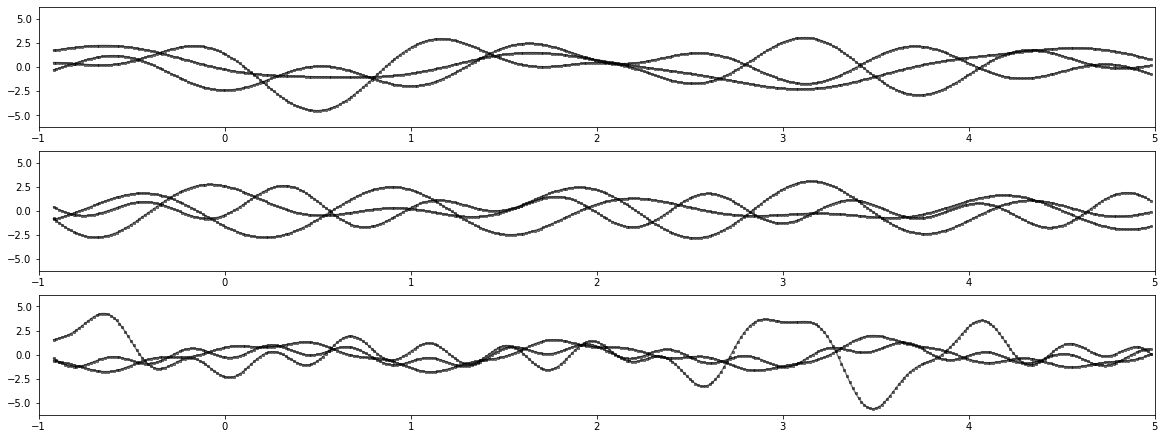

In [13]:
numsamples=3
xa_samples,prior_samples = i_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

#    plt.ylim(ylim_)
plt.figure(figsize=figsiz_)
color_list = ['r','b','g']
for i in range(nchannels):
    plt.subplot(3,1,i+1)
    for j in range(numsamples):
        plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    plt.xlim(xlim_)
    plt.ylim(ylim_)
plt.show()

In [14]:
#xa_samples.size()

## multiouput corrleated sampling

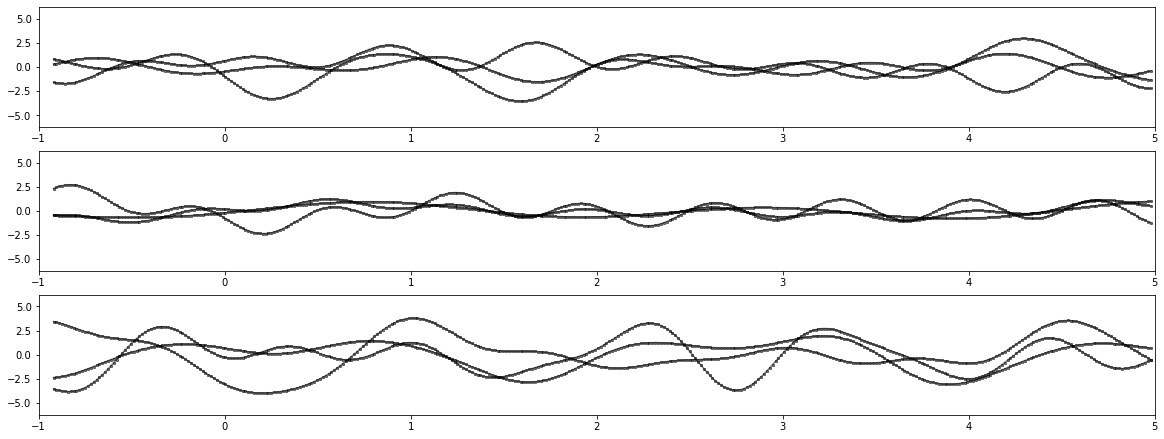

In [15]:
#prior_samples.size()
numsamples=3
xa_samples,prior_samples = m_gpsampler.sample_prior_shared(xc,xc,numsamples=numsamples,reorder=False)

#    plt.ylim(ylim_)
plt.figure(figsize=figsiz_)
color_list = ['r','b','g']
for i in range(nchannels):
    plt.subplot(3,1,i+1)
    for j in range(numsamples):
        plt.plot(xa_samples[0,:,0].cpu().data.numpy(),prior_samples[0,j,:,i].cpu().data.numpy(),'k'+'s-',alpha=0.5,markersize=2)      
    plt.xlim(xlim_)
    plt.ylim(ylim_)
plt.show()


In [16]:
m_gpsampler.multiplier,m_gpsampler.points_per_unit, xa_samples.size()

(64, 64, torch.Size([3, 384, 1]))

In [17]:
# import matplotlib.pyplot as plt
# figsiz_=(20,2.5*3)
# #delta=
# #ylim_ = [-5-delta,5+delta]
# #ylim_ = [-10-delta,10+delta]

# #xlim_ = [0-delta,10+delta]

## get posterior

### independent gp

compute inverse free indepedent


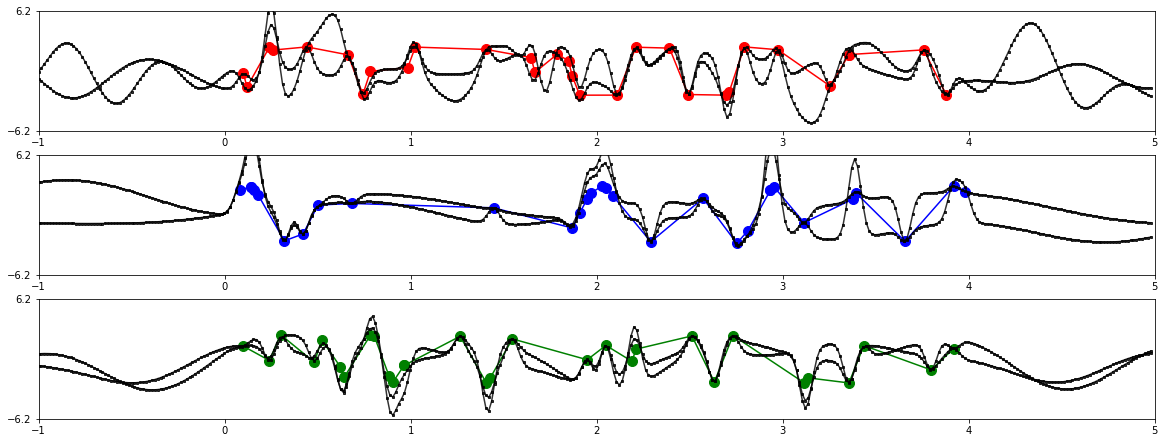

In [18]:
numsamples=2
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density = i_gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)

#posterior_samples = posterior_samples.mean(dim=1,keepdim=True)
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=100,reorder=True)
#xct_samples,posterior_samples,prior_samples = randomfourier.sample_posterior(xc,yc,xc,reorder=True)

#ylim_=[-5,5]
#xlim_=[-1-0.2,11+0.2]
import matplotlib.pyplot as plt
#figsiz_=(20,2*3)
plt.figure(figsize=figsiz_)
color_list = ['r','b','g']
for i in range(nchannels):
    plt.subplot(3,1,i+1)
    plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
    #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
    #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
    for j in range(numsamples):
        #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
        plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
    
    plt.xlim(xlim_)
    plt.ylim(ylim_)
    
    plt.yticks(ylim_)    
    #plt.xticks(np.arange(20)*0.5)
plt.show()









In [19]:
### corrleate gp

compute inverse free multi correlated


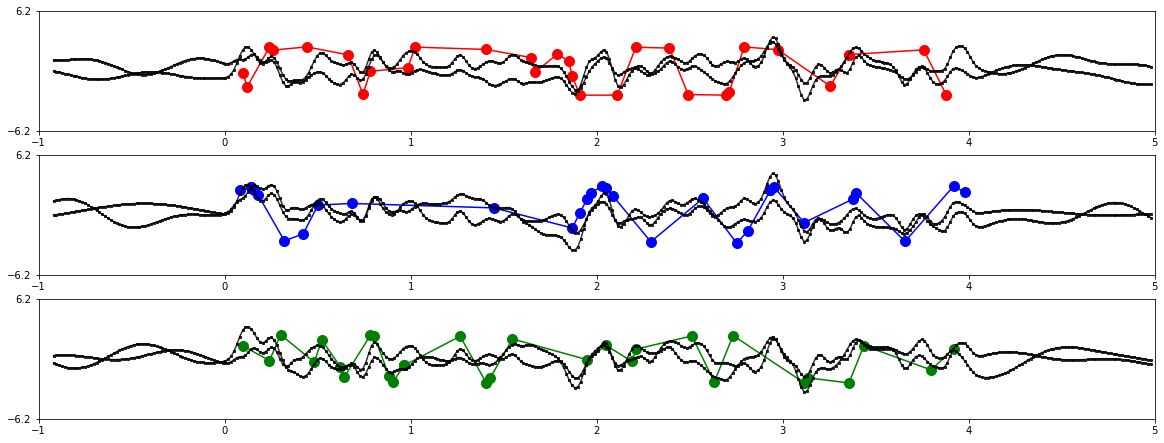

In [22]:
#numsamples=3
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=numsamples,reorder=False)
xa_samples,posterior_samples,density = m_gpsampler.sample_posterior(xc,yc,xc,numsamples=numsamples,reorder=False)

#posterior_samples = posterior_samples.mean(dim=1,keepdim=True)
#xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=100,reorder=True)
#xct_samples,posterior_samples,prior_samples = randomfourier.sample_posterior(xc,yc,xc,reorder=True)

#ylim_=[-5,5]
#xlim_=[-1-0.2,11+0.2]
import matplotlib.pyplot as plt
#figsiz_=(20,2*3)
plt.figure(figsize=figsiz_)
color_list = ['r','b','g']
for i in range(nchannels):
    plt.subplot(3,1,i+1)
    plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
    #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
    #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
    #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)
    for j in range(numsamples):
        #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
        plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,j,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=2)   
    plt.xlim(xlim_)
    plt.ylim(ylim_)
    
    plt.yticks(ylim_)    
    #plt.xticks(np.arange(20)*0.5)
plt.show()









In [93]:
# xa_samples,posterior_samples,density = gpsampler.sample_posterior(xc,yc,xt,numsamples=10,reorder=False)
# post_mean,post_std = posterior_samples.mean(dim=1),posterior_samples.std(dim=1)
# #posterior_samples = posterior_samples.mean(dim=1,keepdim=True)
# #xa_samples,posterior_samples,prior_samples = gpsampler.sample_posterior(xc,yc,xt,numsamples=100,reorder=True)
# #xct_samples,posterior_samples,prior_samples = randomfourier.sample_posterior(xc,yc,xc,reorder=True)

# #delta=1
# # ylim_=[-4,4]
# # xlim_=[0-delta,10+delta]
# plt.figure(figsize=figsiz_)
# for i in range(nchannels):
#     plt.subplot(3,1,i+1)
#     plt.plot(xc[0,:,0,i].cpu().data.numpy(),yc[0,:,i].cpu().data.numpy(),color_list[i]+'o-',markersize=10)
#     #plt.plot(xt[0,:,0,i].cpu().data.numpy(),yt[0,:,i].cpu().data.numpy(),color_list[i]+'s',markersize=10)
    
#     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples)[0,:,i].cpu().data.numpy(),'k'+'d',alpha=0.2)        
#     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),(prior_samples+update_term)[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8)    
    
#     #plt.plot(xct_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.5)    
#     #plt.plot(xa_samples[0,:,0].cpu().data.numpy(),posterior_samples[0,0,:,i].cpu().data.numpy(),'k'+'s',alpha=0.8,markersize=5)   
#     plt.plot(xa_samples[0,:,0].cpu().data.numpy(),post_mean[0,:,i].cpu().data.numpy(),'k-'+'s',alpha=0.8,markersize=5)
#     plt.plot(xa_samples[0,:,0].cpu().data.numpy(),(post_mean+2*post_std)[0,:,i].cpu().data.numpy(),'k-',alpha=0.8,markersize=5)
#     plt.plot(xa_samples[0,:,0].cpu().data.numpy(),(post_mean-2*post_std)[0,:,i].cpu().data.numpy(),'k-',alpha=0.8,markersize=5)
    
#     plt.xlim(xlim_)
#     plt.ylim(ylim_)
#     #plt.yticks([0-1,0,5+1])    
#     #plt.yticks([0,1+1])    
#     plt.xticks(np.arange(20)*0.5)
# plt.show()



In [19]:
#post_std[0]